# Assignment

In [68]:
## importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
## loading data set
bank_1=pd.read_csv('bank-full.csv')

In [70]:
## chaking shape
bank_1.shape

(45211, 17)

In [71]:
## chaking info
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [72]:
## chaking data set
bank_1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [73]:
bank_1.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [74]:
bank_1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [75]:
bank_1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [76]:
## as there is many colum which have dosent meaning so we drrop all that colums
bank_2=bank_1.drop(['job','marital','education','contact','day','month','poutcome'],axis=1)

In [77]:
bank_2.head(10)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,no,2143,yes,no,261,1,-1,0,no
1,44,no,29,yes,no,151,1,-1,0,no
2,33,no,2,yes,yes,76,1,-1,0,no
3,47,no,1506,yes,no,92,1,-1,0,no
4,33,no,1,no,no,198,1,-1,0,no
5,35,no,231,yes,no,139,1,-1,0,no
6,28,no,447,yes,yes,217,1,-1,0,no
7,42,yes,2,yes,no,380,1,-1,0,no
8,58,no,121,yes,no,50,1,-1,0,no
9,43,no,593,yes,no,55,1,-1,0,no


## EDA

In [78]:
## converting catagorical into int
bank_2['default'] = bank_2['default'].map( 
                   {'yes':1 ,'no':0}) 
bank_2['housing'] = bank_2['housing'].map( 
                   {'yes':1 ,'no':0}) 
bank_2['loan'] = bank_2['loan'].map( 
                   {'yes':1 ,'no':0}) 
bank_2['Target'] = bank_2['Target'].map( 
                   {'yes':1 ,'no':0}) 

In [79]:
bank_2.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,2143,1,0,261,1,-1,0,0
1,44,0,29,1,0,151,1,-1,0,0
2,33,0,2,1,1,76,1,-1,0,0
3,47,0,1506,1,0,92,1,-1,0,0
4,33,0,1,0,0,198,1,-1,0,0


In [80]:
bank_2['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

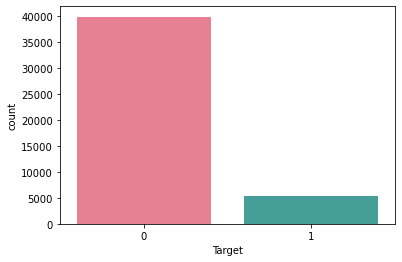

In [81]:
## Graphical reprentation 
sns.countplot(x="Target", data=bank_2, palette="husl")
plt.show()

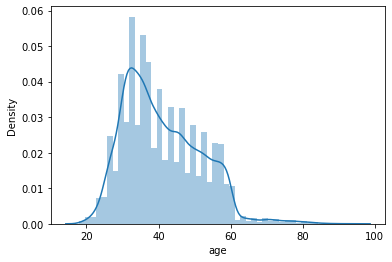

In [82]:
sns.distplot(bank_2['age'])
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<AxesSubplot:xlabel='age'>

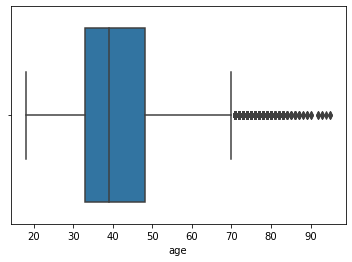

In [83]:
## chaking for outliers
sns.boxplot(bank_2['age'])

In [84]:
## Function to find wishker
def outliers(bank_2, feature):
    Q1= bank_2[feature].quantile(0.25)
    Q3 = bank_2[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_2, "age")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  70.5
Lower Whisker:  10.5


In [85]:
## to find outliers
bank_2[(bank_2['age'] < lower) | (bank_2['age'] > upper)].shape

(487, 10)

In [86]:
## Droping outliers
bank_3= bank_2[(bank_2['age'] > lower) & (bank_2['age'] < upper)]

<AxesSubplot:xlabel='age'>

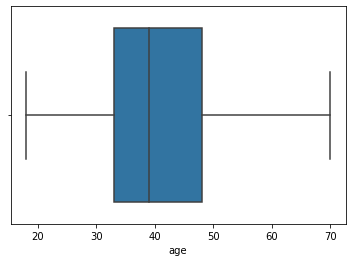

In [87]:
sns.boxplot(bank_3['age'])

In [88]:
bank_3.shape

(44724, 10)

<AxesSubplot:xlabel='balance', ylabel='Density'>

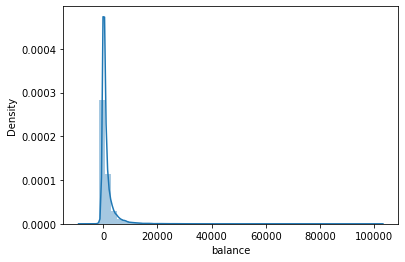

In [89]:
sns.distplot(bank_2['balance'])

<AxesSubplot:xlabel='balance'>

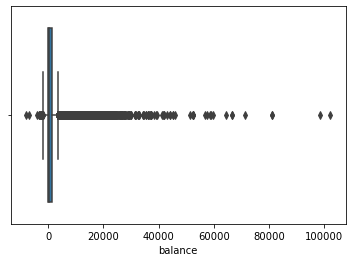

In [90]:
sns.boxplot(bank_2['balance'])

In [91]:
## Function to find wishker
def outliers(bank_2, feature):
    Q1= bank_2[feature].quantile(0.25)
    Q3 = bank_2[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_2, "balance")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  3462.0
Lower Whisker:  -1962.0


In [92]:
# to find outliers
bank_2[(bank_2['balance'] < lower) | (bank_2['balance'] > upper)].shape

(4729, 10)

In [93]:
bank_2['balance'].median()

448.0

In [94]:
## Droping outliers
bank_4= bank_3[(bank_3['balance'] > lower) & (bank_3['balance'] < upper)]

In [95]:
bank_4.shape

(40106, 10)

<AxesSubplot:xlabel='balance'>

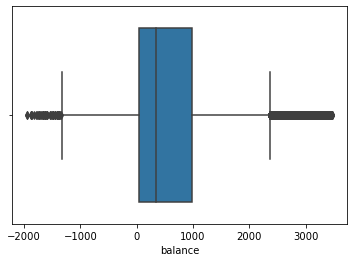

In [96]:
sns.boxplot(bank_4['balance'])

In [97]:
## Function to find wishker
def outliers(bank_4, feature):
    Q1= bank_4[feature].quantile(0.25)
    Q3 = bank_4[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_4, "balance")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  2365.0
Lower Whisker:  -1347.0


In [98]:
# to find outliers
bank_4[(bank_4['balance'] < lower) | (bank_4['balance'] > upper)].shape

(2541, 10)

In [99]:
bank_5= bank_4[(bank_4['balance'] > lower) & (bank_4['balance'] < upper)]

<AxesSubplot:xlabel='balance'>

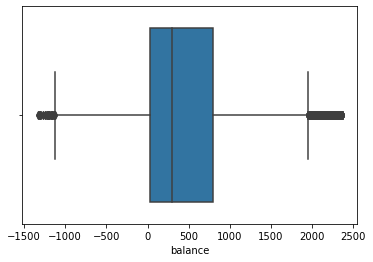

In [100]:
sns.boxplot(bank_5['balance'])

<AxesSubplot:xlabel='balance'>

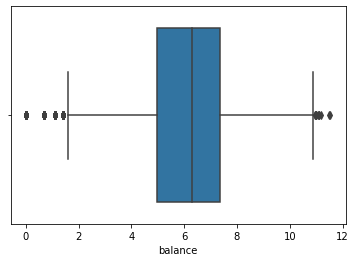

In [198]:
sns.boxplot(bank_3['balance'])

In [199]:
## chaking by square root
z=np.sqrt(bank_2['balance'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

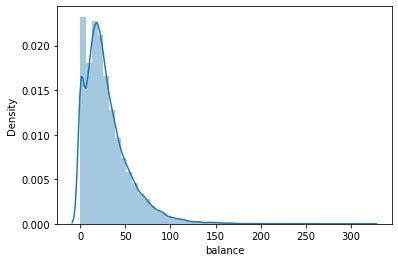

In [200]:
sns.distplot(z)

<AxesSubplot:xlabel='balance'>

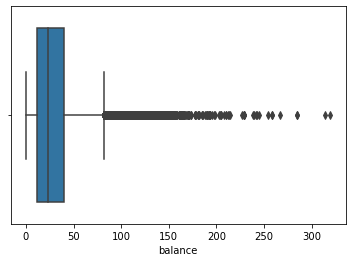

In [201]:
sns.boxplot(z)

### Going with log opearation as there are minimum outliers

<AxesSubplot:xlabel='balance'>

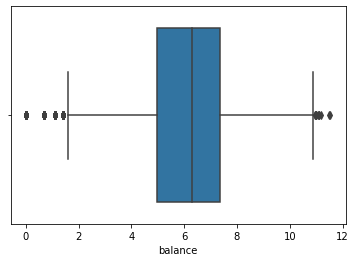

In [202]:
## box plot of balance with log operation
sns.boxplot(bank_3['balance'])

In [203]:
## find wishkers
def outliers(bank_3, feature):
    Q1= bank_3[feature].quantile(0.25)
    Q3 = bank_3[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_3, "balance")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  10.93794075511309
Lower Whisker:  1.400009534805065


In [204]:
## Finding outliers
bank_3[(bank_3['balance'] < lower) | (bank_3['balance'] > upper)].shape

(4103, 10)

In [205]:
## as outliers are more so they are replace with mean
Q1 = bank_3['balance'].quantile(0.25)
Q3 = bank_3['balance'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +( whisker_width*IQR)
bank_3['balance']=np.where(bank_3['balance']>upper_whisker,upper_whisker,np.where
                      (bank_3['balance']<lower_whisker,lower_whisker,bank_3['balance']))

<AxesSubplot:xlabel='balance'>

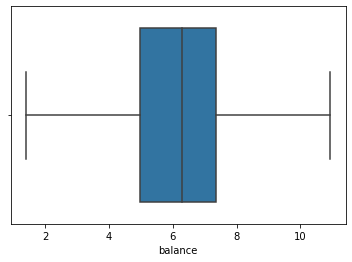

In [206]:
sns.boxplot(bank_3['balance'])

# all outliers are replace by nearby values

In [207]:
bank_3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,7.669962,1,0,261,1,-1,0,0
1,44,0,3.367296,1,0,151,1,-1,0,0
2,33,0,1.400010,1,1,76,1,-1,0,0
3,47,0,7.317212,1,0,92,1,-1,0,0
4,33,0,1.400010,0,0,198,1,-1,0,0


<AxesSubplot:xlabel='duration', ylabel='Density'>

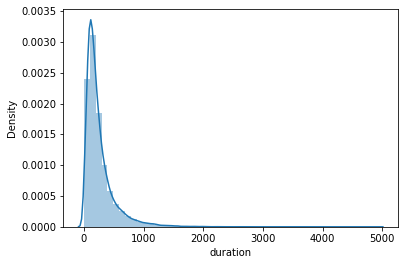

In [208]:
## checking for the duration
sns.distplot(bank_3['duration'])

<AxesSubplot:xlabel='duration'>

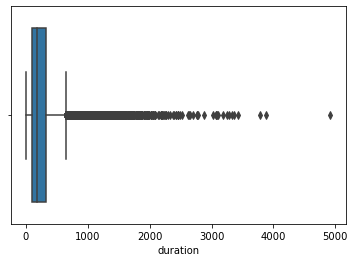

In [209]:
sns.boxplot(bank_3['duration'])

In [210]:
## log operation on duration
a=np.log(bank_3['duration'])

In [211]:
bank_3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,7.669962,1,0,261,1,-1,0,0
1,44,0,3.367296,1,0,151,1,-1,0,0
2,33,0,1.400010,1,1,76,1,-1,0,0
3,47,0,7.317212,1,0,92,1,-1,0,0
4,33,0,1.400010,0,0,198,1,-1,0,0


<AxesSubplot:xlabel='duration'>

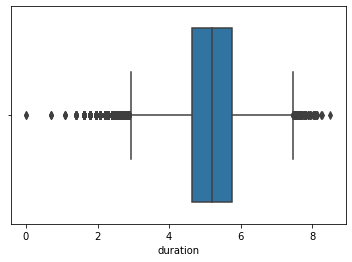

In [212]:
sns.boxplot(a)

In [213]:
## chaking with squareroot
bank_3['duration']=np.sqrt(bank_3['duration'])

In [214]:
bank_3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,7.669962,1,0,16.155494,1,-1,0,0
1,44,0,3.367296,1,0,12.288206,1,-1,0,0
2,33,0,1.400010,1,1,8.717798,1,-1,0,0
3,47,0,7.317212,1,0,9.591663,1,-1,0,0
4,33,0,1.400010,0,0,14.071247,1,-1,0,0


<AxesSubplot:xlabel='duration', ylabel='Density'>

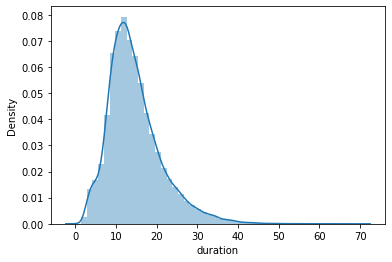

In [215]:
sns.distplot(bank_3['duration'])

<AxesSubplot:xlabel='duration'>

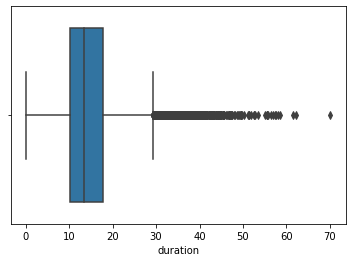

In [216]:
sns.boxplot(bank_3['duration'])

In [217]:
## finding wisker
def outliers(bank_3, feature):
    Q1= bank_3[feature].quantile(0.25)
    Q3 = bank_3[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_3, "duration")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  29.358048902679187
Lower Whisker:  -1.376602837459961


In [218]:
## Finding outliers
bank_3[(bank_3['duration'] < lower) | (bank_3['duration'] > upper)].shape

(1574, 10)

In [219]:
## replace with nearby value
Q1 = bank_3['duration'].quantile(0.25)
Q3 = bank_3['duration'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +( whisker_width*IQR)
bank_3['duration']=np.where(bank_3['duration']>upper_whisker,upper_whisker,np.where
                      (bank_3['duration']<lower_whisker,lower_whisker,bank_3['duration']))

<AxesSubplot:xlabel='duration'>

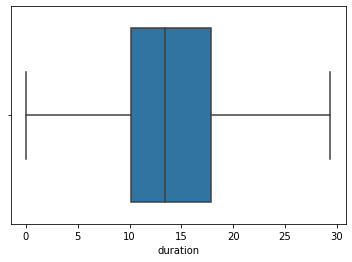

In [220]:
sns.boxplot(bank_3['duration'])

## Replacing all the values by nearby values

In [221]:
bank_3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,0,7.669962,1,0,16.155494,1,-1,0,0
1,44,0,3.367296,1,0,12.288206,1,-1,0,0
2,33,0,1.400010,1,1,8.717798,1,-1,0,0
3,47,0,7.317212,1,0,9.591663,1,-1,0,0
4,33,0,1.400010,0,0,14.071247,1,-1,0,0


In [222]:
bank_3.shape

(44724, 10)

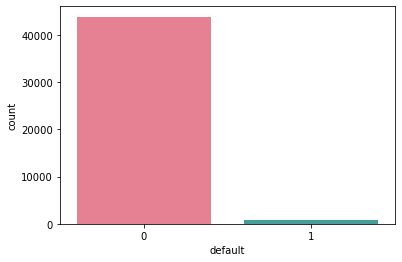

In [223]:
## Graphical reprentation for default
sns.countplot(x="default", data=bank_3, palette="husl")
plt.show()

<AxesSubplot:xlabel='default', ylabel='Target'>

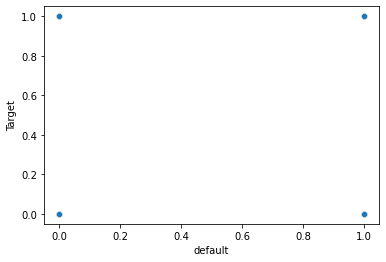

In [224]:
## chaking the relation using scatter plot
sns.scatterplot(data=bank_3, x="default", y="Target")

In [225]:
## no relation so we can drop this colum & also lot of no value so we drop it
bank_4=bank_3.drop(['default'],axis=1)

In [226]:
bank_4.head()

,age,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,7.669962,1,0,16.155494,1,-1,0,0
1,44,3.367296,1,0,12.288206,1,-1,0,0
2,33,1.400010,1,1,8.717798,1,-1,0,0
3,47,7.317212,1,0,9.591663,1,-1,0,0
4,33,1.400010,0,0,14.071247,1,-1,0,0


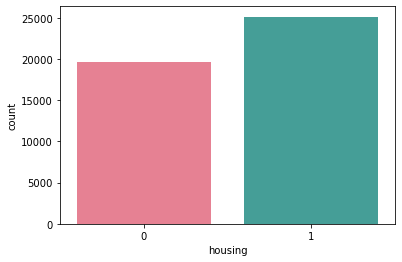

In [227]:
##chaking for housing
sns.countplot(x="housing", data=bank_3, palette="husl")
plt.show()

<AxesSubplot:xlabel='housing', ylabel='Target'>

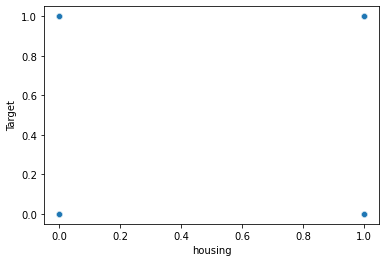

In [228]:
sns.scatterplot(data=bank_4, x="housing", y="Target")

## WE can not drop this colum as 0&1 equally distributed so we go ahead for next evlation

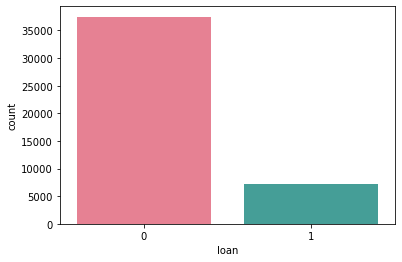

In [229]:
##chaking for loan
sns.countplot(x="loan", data=bank_3, palette="husl")
plt.show()

<AxesSubplot:xlabel='housing', ylabel='Target'>

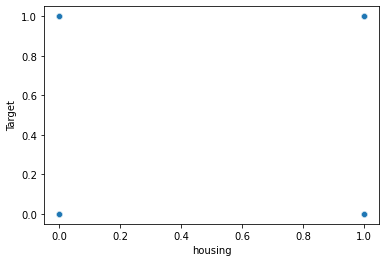

In [230]:
sns.scatterplot(data=bank_4, x="housing", y="Target")

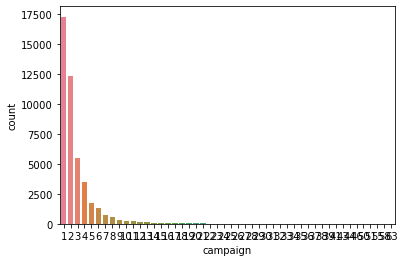

In [231]:
##chaking for campaign
sns.countplot(x="campaign", data=bank_4, palette="husl")
plt.show()

<AxesSubplot:xlabel='campaign', ylabel='Density'>

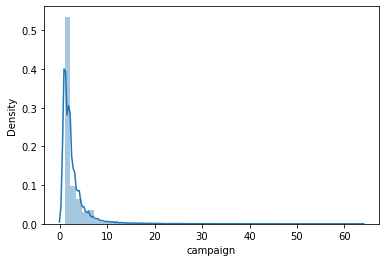

In [232]:
sns.distplot(bank_4['campaign'])

In [233]:
bank_4.tail()

,age,balance,housing,loan,duration,campaign,pdays,previous,Target
45203,23,4.727388,0,0,16.309506,1,-1,0,1
45205,25,6.224558,0,1,19.646883,2,-1,0,1
45206,51,6.715383,0,0,29.358049,3,-1,0,1
45209,57,6.504288,0,0,22.538855,4,-1,0,0
45210,37,7.996654,0,0,19.000000,2,188,11,0


<AxesSubplot:xlabel='campaign'>

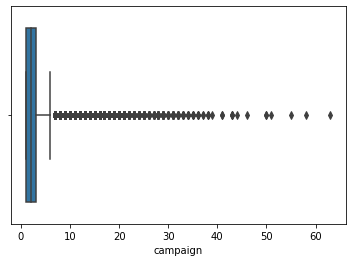

In [234]:
sns.boxplot(bank_4['campaign'])

In [235]:
def outliers(bank_4, feature):
    Q1= bank_4[feature].quantile(0.25)
    Q3 = bank_4[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(bank_4, "campaign")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  6.0
Lower Whisker:  -2.0


In [236]:
## Finding outliers
bank_4[(bank_4['campaign'] < lower) | (bank_4['campaign'] > upper)].shape

(3050, 9)

In [237]:
## as outliers are more so they are replace with mean
Q1 = bank_4['campaign'].quantile(0.25)
Q3 = bank_4['campaign'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +( whisker_width*IQR)
bank_4['campaign']=np.where(bank_4['campaign']>upper_whisker,upper_whisker,np.where
                      (bank_4['campaign']<lower_whisker,lower_whisker,bank_4['campaign']))

<AxesSubplot:xlabel='campaign'>

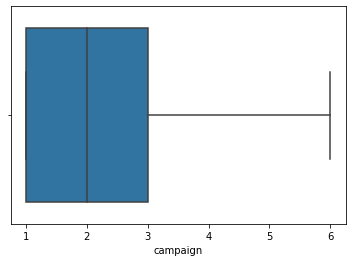

In [238]:
sns.boxplot(bank_4['campaign'])

In [239]:
bank_4.head()

,age,balance,housing,loan,duration,campaign,pdays,previous,Target
0,58,7.669962,1,0,16.155494,1.0,-1,0,0
1,44,3.367296,1,0,12.288206,1.0,-1,0,0
2,33,1.400010,1,1,8.717798,1.0,-1,0,0
3,47,7.317212,1,0,9.591663,1.0,-1,0,0
4,33,1.400010,0,0,14.071247,1.0,-1,0,0


<AxesSubplot:xlabel='pdays', ylabel='Target'>

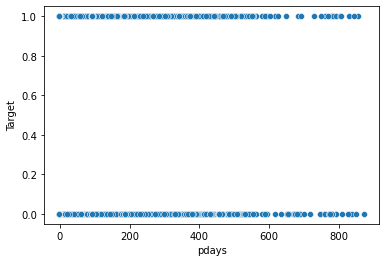

In [240]:
##chaking for pdays
sns.scatterplot(data=bank_4, x="pdays", y="Target")

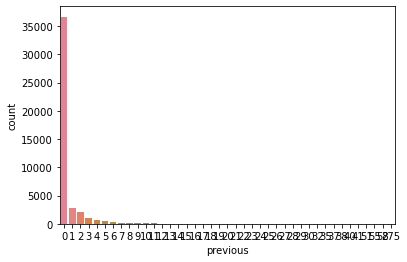

In [241]:
## chaking for previous
sns.countplot(x="previous", data=bank_4, palette="husl")
plt.show()

<AxesSubplot:xlabel='previous', ylabel='Target'>

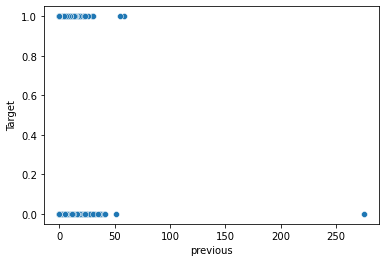

In [242]:
sns.scatterplot(data=bank_4, x="previous", y="Target")

In [243]:
## droping the colum
bank_5=bank_4.drop(['pdays','previous'],axis=1)

In [244]:
bank_5.head()

,age,balance,housing,loan,duration,campaign,Target
0,58,7.669962,1,0,16.155494,1.0,0
1,44,3.367296,1,0,12.288206,1.0,0
2,33,1.400010,1,1,8.717798,1.0,0
3,47,7.317212,1,0,9.591663,1.0,0
4,33,1.400010,0,0,14.071247,1.0,0


In [245]:
bank_5['balance']=np.exp(bank_5['balance'])

In [251]:
bank_5.head()

,age,balance,housing,loan,duration,campaign,Target
0,58,2143.000000,1,0,16.155494,1.0,0
1,44,29.000000,1,0,12.288206,1.0,0
2,33,4.055239,1,1,8.717798,1.0,0
3,47,1506.000000,1,0,9.591663,1.0,0
4,33,4.055239,0,0,14.071247,1.0,0


In [252]:
bank_5['duration']=np.exp(bank_5['duration'])

In [253]:
bank_5.head()

,age,balance,housing,loan,duration,campaign,Target
0,58,2143.000000,1,0,1.038107e+07,1.0,0
1,44,29.000000,1,0,2.171201e+05,1.0,0
2,33,4.055239,1,1,6.110708e+03,1.0,0
3,47,1506.000000,1,0,1.464220e+04,1.0,0
4,33,4.055239,0,0,1.291413e+06,1.0,0


## building the 1st model

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [248]:
## sepration of the data into target & features
X = bank_5[['age', 'balance', 'housing','loan','duration','campaign']]
y = bank_5['Target']

In [249]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)  

In [250]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').